## Imports

In [2]:
import sys
sys.path.append("../figures")

from where_chicago import WhereGrey, RetinaWhiten, TransformDico, ChicagoFacesDataset,  WhatGender, WhatGenderTrainer

In [3]:
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

## Rétine

In [18]:
from main import init
args = init(filename='../data/2019-07-23')
#args.minibatch_size = 10
#args.momentum = 0
#args.bn1_bn_momentum = 0
#args.bn2_bn_momentum = 0
#args.p_dropout = 0.5
args

{'w': 28,
 'minibatch_size': 10,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 48,
 'N_eccentricity': 24,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': 'adam',
 'bn1_bn_momentum': 0,
 'bn2_bn_momentum': 0,
 'momentum': 0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 20,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True}

In [19]:
from retina_chicago import Retina
retina = Retina(args)

../tmp/retina_6_48_24_2_1.41_1718_dico.npy
Fichier retina_dico charge avec succes


## Test ChicagoFacesDataset nouvelle version

### Transformations appliquées

In [5]:
transform = transforms.Compose([
                                WhereGrey(args),
                                RetinaWhiten(args),
                                TransformDico(retina)
                            ])

Si TransformDico est commenté ci-dessus, mettez transform_dico = False ci-dessous, et inversement.

In [6]:
transform_dico = True

### Dataset_train

In [7]:
dataset_train = ChicagoFacesDataset(args, use='train', transform=transform)

In [8]:
print(len(dataset_train))

1000


In [9]:
gender = ["Homme", "Femme"]

In [ ]:
# Pour faire fonctionner cette case, verifiez que transform_dico ait la bonne valeur 
# dans la section Transformations appliquees

index_image = np.random.randint(len(dataset_train))
print(index_image, "/", len(dataset_train))

if not transform_dico :
    image, label = dataset_train[index_image]
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    plt.title(gender[label])
    plt.show()
    
else : 
    retina_features, target = dataset_train[index_image]
    print(gender[target], len(retina_features), retina_features[0:50])

"""
else :
    data, label = dataset_train[index_image]
    pixel_fullfield, retina_features = data
    plt.figure(figsize=(20,20))
    plt.imshow(pixel_fullfield)
    plt.title(gender[label])
    print(gender[label], len(retina_features), retina_features[0:50])
"""
print("")

### Train_loader

In [14]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True
                                          )

In [15]:
batch_data_train, batch_label_train = next(iter(train_loader))

In [17]:
print(len(batch_data_train))
print(len(batch_data_train[0]))
print(len(batch_data_train[1]))

10
13824
13824


In [20]:
# Pour faire fonctionner cette case, verifiez que transform_dico ait la bonne valeur 
# dans la section Transformations appliquees

index_image2 = 0
print(index_image2, "/", len(batch_data_train))

if not transform_dico :
    image2, label2 = batch_data_train[index_image2], batch_label_train[index_image2]
    plt.figure(figsize=(20,20))
    plt.imshow(image2)
    plt.title(gender[label2])
    plt.show()
    
else : 
    retina_features2, target2 = dataset_train[index_image2]
    print(gender[target2], len(retina_features2), retina_features2[0:50])
    
""" 
else :
    pixel_fullfield2, retina_features2 = batch_data_train[0][index_image2], batch_data_train[1][index_image2]
    label2 = batch_label_train[index_image2]
    plt.figure(figsize=(20,20))
    plt.imshow(pixel_fullfield2)
    plt.title(gender[label2])    
    print(gender[label2], len(retina_features2), retina_features2[0:50])
"""
print("")

0 / 10
Homme 13824 [-8.43302769e-03 -5.04846717e-01  2.74201545e-01 -1.90489386e-01
 -1.85228206e-01  1.34491777e-01  1.87259370e-02 -2.24720420e-01
  1.36746133e-01 -1.17775804e-01  2.75445047e-01 -8.73027278e-02
 -8.74456326e-02 -1.67455557e-01  2.73598384e-01  5.12371962e-01
 -1.31338240e-02  1.40112428e-01 -2.29215653e-01  4.03796118e-01
  2.07995987e-01 -1.00922375e+00 -4.45188455e-01 -8.34012304e-01
 -5.20027766e-01 -5.58744385e-01 -4.08982680e-02  6.17343583e-01
  2.22202555e+00 -8.07450437e-01  2.58981449e+00  1.79752656e+00
  2.05476549e+00  1.51645035e+00 -2.36946189e+00 -6.97914293e-01
  1.56324914e+00 -6.23116799e-01 -1.15009466e+00 -1.35184466e+00
  2.38836715e+00  4.74903644e-01  1.51347713e+00 -6.70407006e+00
 -4.32860774e-01 -3.39606019e+00 -8.04649263e+00 -4.05577475e+00
  2.59574486e-01  6.24841171e-03]



In [21]:
print(batch_label_train)

tensor([1, 1, 0, 1, 0, 0, 0, 1, 1, 1])


## Test WhatGenderTrainer

In [22]:
what_gender_trainer = WhatGenderTrainer(args, retina)

Initialisation WhatTrainer

Initialisation dataset_train
len dataloader 100

Initialisation dataset_test
len dataloader 13
Calcul model


In [ ]:
what_gender = WhatGender(args, retina)

### Expérimentations fichiers sauvegardés

In [24]:
train_loader = torch.load("../tmp/train_loader_faces_2019-07-24_10h23.pt")

In [25]:
print(len(train_loader))

100


In [26]:
batch_train_data, batch_train_label = next(iter(train_loader))

In [27]:
print(batch_train_data, batch_train_label)

tensor([[ 0.0841,  0.0815, -0.0543,  ..., -1.9242, -7.5619, -0.2746],
        [-0.1200, -0.0180, -0.0097,  ...,  0.0560,  0.1008, -5.1102],
        [ 0.0911,  0.0108, -0.0927,  ..., -0.1992,  0.7810,  2.1390],
        ...,
        [ 0.0196, -0.1037,  0.0511,  ..., -2.9915, -7.6390,  7.8602],
        [-0.0369,  0.1266,  0.0154,  ..., -1.1818,  1.5887,  0.2877],
        [-0.0246, -0.1076, -0.1003,  ..., -1.3526,  4.6222, -0.9597]],
       dtype=torch.float64) tensor([1, 1, 0, 1, 0, 1, 0, 0, 1, 0])


In [28]:
print(len(batch_train_data), len(batch_train_data[0]))

10 13824


In [29]:
test_loader = torch.load("../tmp/test_loader_faces_2019-07-23_16h49.pt")

In [30]:
print(len(test_loader))

13


In [31]:
batch_test_data = next(iter(test_loader))

TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.Image.Image'>

## Test 2

In [44]:
import datetime
from torch.utils.data import *

In [45]:
dataset_train = ChicagoFacesDataset(args, use='train', transform=transform)

In [46]:
data_loader = DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True
                                          )

In [47]:
use = 'train'

In [49]:
if args.verbose: 
    print('Generating {}ing dataset'.format(use))
for i, (data, target) in enumerate(data_loader):
    if i ==3 : break
    if args.verbose: 
        print(i, (i+1) * args.minibatch_size)
    if i == 0:
        full_data = data
        full_target = target
    else:
        full_data = torch.cat((full_data, data), 0)
        full_target = torch.cat((full_target, target), 0)

Generating training dataset
0 10
1 20
2 30


In [50]:
dataset = TensorDataset(full_data, full_target)

data_loader = DataLoader(dataset,
                         batch_size=args.minibatch_size,
                         shuffle=True)
print("type", type(data_loader))
print(data_loader)
date = str(datetime.datetime.now())
data_loader_path = "../tmp/test2_train_loader_faces_{}_{}h{}.pt".format(date[0:10], date[11:13], date[14:16])
print("chemin", data_loader_path)
torch.save(data_loader, data_loader_path)
if args.verbose: 
    print('Done!')

type <class 'torch.utils.data.dataloader.DataLoader'>
chemin ../tmp/test2_train_loader_faces_2019-07-24_11h29.pt
Done!


## Test2 des données enregistrées 

In [52]:
train_loader = torch.load("../tmp/test2_train_loader_faces_2019-07-24_11h29.pt")

In [53]:
print(len(train_loader))

3


In [58]:
batch_train_data, batch_train_label = next(iter(train_loader))

In [59]:
print(batch_train_data, batch_train_label)

tensor([[-2.9067e-02, -1.0041e-01,  2.3167e-02,  ...,  1.6472e+01,
          1.1225e+01,  5.7120e+00],
        [-8.2785e-02,  8.3567e-02, -6.5305e-02,  ..., -1.4330e+00,
         -4.7928e+00,  3.7585e+00],
        [ 1.8049e-01,  1.5317e-01,  1.3850e-01,  ..., -1.2146e-02,
         -3.1848e-01, -2.2894e+00],
        ...,
        [ 1.0457e-01, -4.1642e-01,  1.4866e-01,  ...,  1.1836e+00,
         -6.5415e-01, -7.2392e+00],
        [ 5.0061e-03, -7.5833e-02,  2.6431e-02,  ..., -6.6747e-01,
         -7.3886e-01,  6.0270e+00],
        [ 2.9495e-01, -1.4450e-01,  2.2260e-01,  ..., -3.6393e+00,
         -3.9026e+00, -1.3894e+01]], dtype=torch.float64) tensor([1, 1, 1, 0, 0, 0, 0, 0, 1, 1])


## Implémentation de Test2 dans le script

In [5]:
what_gender_trainer = WhatGenderTrainer(args, retina)

Initialisation WhatTrainer

Initialisation dataset_train
Generating training dataset
0 10
chemin ../tmp/train_loader_faces_2019-07-24_11h56.pt
Done!

Initialisation dataset_test
Generating testing dataset
0 10
chemin ../tmp/test_loader_faces_2019-07-24_11h57.pt
Done!
Calcul model


In [6]:
train_loader = torch.load("../tmp/train_loader_faces_2019-07-24_11h56.pt")

In [8]:
print(len(train_loader))

1


In [7]:
batch_train_data, batch_train_label = next(iter(train_loader))

In [9]:
print(batch_train_data, batch_train_label)

tensor([[-0.0517, -0.3476,  0.1146,  ..., -6.9002, -4.7002, -4.4708],
        [ 0.0906, -0.0949, -0.0375,  ..., -0.1138, -3.3303,  3.4192],
        [ 0.0299,  0.1818, -0.0271,  ...,  0.0560,  1.8904,  1.2772],
        ...,
        [-0.0974,  0.0723, -0.1160,  ..., -4.7446, -7.0167,  5.0686],
        [ 0.1113, -0.0422,  0.0328,  ...,  0.8332, -0.4580, -1.0406],
        [ 0.1382,  0.1034, -0.0832,  ...,  0.6276, -0.6741,  0.0848]],
       dtype=torch.float64) tensor([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])


In [11]:
print(len(batch_train_data[0]))

13824


In [12]:
test_loader = torch.load("../tmp/test_loader_faces_2019-07-24_11h57.pt")

In [14]:
print(len(test_loader))

1


In [15]:
batch_test_data, batch_test_label = next(iter(test_loader))

In [16]:
print(batch_test_data, batch_test_label)

tensor([[-0.3019, -0.0305, -0.1613,  ..., -1.6066, -3.2012, -5.7370],
        [-0.0998, -0.2543,  0.1779,  ...,  0.2187, -0.4956,  1.1040],
        [-0.1147,  0.1007, -0.2085,  ..., -0.6923, -6.0460,  1.0874],
        ...,
        [-0.1908, -0.0835, -0.1759,  ..., -1.1152, -4.4146, -4.3484],
        [-0.0940, -0.2340,  0.3047,  ...,  0.9486, -0.4127,  0.3951],
        [-0.0859,  0.1340, -0.1624,  ..., -6.1593, -0.7046,  1.1495]],
       dtype=torch.float64) tensor([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])


## Génération des 2 dataloaders complets

In [5]:
what_gender_trainer = WhatGenderTrainer(args, retina)

Initialisation WhatTrainer

Initialisation dataset_train
Generating training dataset
0 10
1 20
2 30
3 40
4 50
5 60
6 70
7 80
8 90
9 100
10 110
11 120
12 130
13 140
14 150
15 160
16 170
17 180
18 190
19 200
20 210
21 220
22 230
23 240
24 250
25 260
26 270
27 280
28 290
29 300
30 310
31 320
32 330
33 340
34 350
35 360
36 370
37 380
38 390
39 400
40 410
41 420
42 430
43 440
44 450
45 460
46 470
47 480
48 490
49 500
50 510
51 520
52 530
53 540
54 550
55 560
56 570
57 580
58 590
59 600
60 610
61 620
62 630
63 640
64 650
65 660
66 670
67 680
68 690
69 700
70 710
71 720
72 730
73 740
74 750
75 760
76 770
77 780
78 790
79 800
80 810
81 820
82 830
83 840
84 850
85 860
86 870
87 880
88 890
89 900
90 910
91 920
92 930
93 940
94 950
95 960
96 970
97 980
98 990
99 1000
chemin ../tmp/train_loader_faces_2019-07-24_13h22.pt
Done!

Initialisation dataset_test
Generating testing dataset
0 10
1 20
2 30
3 40
4 50
5 60
6 70
7 80
8 90
9 100
10 110
11 120
12 130
chemin ../tmp/test_loader_faces_2019-07-24_13h

In [20]:
args.epochs = 10

In [21]:
train_loader = torch.load("../tmp/train_loader_faces_2019-07-24_13h22.pt")

In [22]:
batch_data_train, batch_label_train = next(iter(train_loader))

In [23]:
test_loader = torch.load("../tmp/test_loader_faces_2019-07-24_13h32.pt")

In [24]:
what_gender = WhatGender(args, retina, train_loader=train_loader, test_loader=test_loader)

../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_10epoques_2019-07-24_16h32.pt
Entrainement du modele en cours
Initialisation WhatTrainer
Chargement train_loader
Chargement test_loader
Calcul model
Epoque n.1
Train Epoch: 1/10 [0/1000 (0%)]	Loss: 0.639583
Train Epoch: 1/10 [200/1000 (20%)]	Loss: 6.505025
Train Epoch: 1/10 [400/1000 (40%)]	Loss: 1.612718
Train Epoch: 1/10 [600/1000 (60%)]	Loss: 1.620018
Train Epoch: 1/10 [800/1000 (80%)]	Loss: 0.487245

Test set: Average loss: 1.2186, Accuracy: 84/126 (67)%

Epoque n.2
Train Epoch: 2/10 [0/1000 (0%)]	Loss: 1.037111
Train Epoch: 2/10 [200/1000 (20%)]	Loss: 1.462829
Train Epoch: 2/10 [400/1000 (40%)]	Loss: 0.714735
Train Epoch: 2/10 [600/1000 (60%)]	Loss: 2.207415
Train Epoch: 2/10 [800/1000 (80%)]	Loss: 2.011737

Test set: Average loss: 3.5829, Accuracy: 89/126 (71)%

Epoque n.3
Train Epoch: 3/10 [0/1000 (0%)]	Loss: 1.140944
Train Epoch: 3/10 [200/1000 (20%)]	Loss: 0.983683
Train Epoch: 3/10 [400/1000 (40%)]	Loss: 0.387069
Train Epoch: 3/1

In [25]:
print(what_gender.list_acc)

[66.66666666666667, 70.63492063492063, 70.63492063492063, 72.22222222222223, 81.74603174603175, 77.77777777777777, 78.57142857142857, 76.19047619047619, 79.36507936507937, 77.77777777777777]


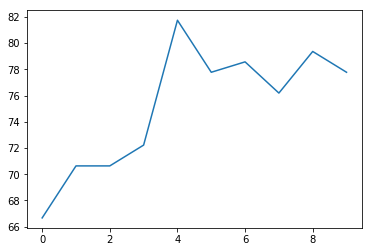

In [26]:
plt.plot(what_gender.list_acc)

## Affichage simultané apprentissage plusieurs lr

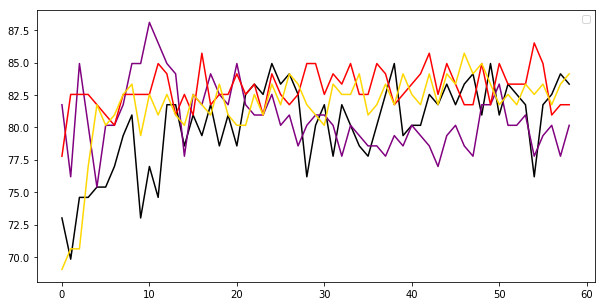

In [14]:
lr_005 = [73.01587301587301, 69.84126984126983, 74.60317460317461, 74.60317460317461, 75.39682539682539, 75.39682539682539, 76.98412698412699, 79.36507936507937, 80.95238095238095, 73.01587301587301, 76.98412698412699, 74.60317460317461, 81.74603174603175, 81.74603174603175, 78.57142857142857, 80.95238095238095, 79.36507936507937, 81.74603174603175, 78.57142857142857, 80.95238095238095, 78.57142857142857, 82.53968253968254, 83.33333333333333, 82.53968253968254, 84.92063492063492, 83.33333333333333, 84.12698412698413, 82.53968253968254, 76.19047619047619, 80.15873015873017, 81.74603174603175, 77.77777777777777, 81.74603174603175, 80.15873015873017, 78.57142857142857, 77.77777777777777, 80.15873015873017, 82.53968253968254, 84.92063492063492, 79.36507936507937, 80.15873015873017, 80.15873015873017, 82.53968253968254, 81.74603174603175, 83.33333333333333, 81.74603174603175, 83.33333333333333, 84.12698412698413, 80.95238095238095, 84.92063492063492, 80.95238095238095, 83.33333333333333, 82.53968253968254, 81.74603174603175, 76.19047619047619, 81.74603174603175, 82.53968253968254, 84.12698412698413, 83.33333333333333]
lr_001 = [81.74603174603175, 76.19047619047619, 84.92063492063492, 80.15873015873017, 75.39682539682539, 80.15873015873017, 80.15873015873017, 81.74603174603175, 84.92063492063492, 84.92063492063492, 88.0952380952381, 86.5079365079365, 84.92063492063492, 84.12698412698413, 77.77777777777777, 82.53968253968254, 81.74603174603175, 84.12698412698413, 82.53968253968254, 81.74603174603175, 84.92063492063492, 81.74603174603175, 80.95238095238095, 80.95238095238095, 82.53968253968254, 80.15873015873017, 80.95238095238095, 78.57142857142857, 80.15873015873017, 80.95238095238095, 80.95238095238095, 80.15873015873017, 77.77777777777777, 80.15873015873017, 79.36507936507937, 78.57142857142857, 78.57142857142857, 77.77777777777777, 79.36507936507937, 78.57142857142857, 80.15873015873017, 79.36507936507937, 78.57142857142857, 76.98412698412699, 79.36507936507937, 80.15873015873017, 78.57142857142857, 77.77777777777777, 81.74603174603175, 81.74603174603175, 83.33333333333333, 80.15873015873017, 80.15873015873017, 80.95238095238095, 77.77777777777777, 79.36507936507937, 80.15873015873017, 77.77777777777777, 80.15873015873017]
lr_0001 = [77.77777777777777, 82.53968253968254, 82.53968253968254, 82.53968253968254, 81.74603174603175, 80.95238095238095, 80.15873015873017, 82.53968253968254, 82.53968253968254, 82.53968253968254, 82.53968253968254, 84.92063492063492, 84.12698412698413, 80.95238095238095, 82.53968253968254, 80.95238095238095, 85.71428571428571, 81.74603174603175, 82.53968253968254, 82.53968253968254, 84.12698412698413, 82.53968253968254, 83.33333333333333, 80.95238095238095, 84.12698412698413, 82.53968253968254, 81.74603174603175, 82.53968253968254, 84.92063492063492, 84.92063492063492, 82.53968253968254, 84.12698412698413, 83.33333333333333, 84.92063492063492, 82.53968253968254, 82.53968253968254, 84.92063492063492, 84.12698412698413, 81.74603174603175, 82.53968253968254, 83.33333333333333, 84.12698412698413, 85.71428571428571, 82.53968253968254, 84.92063492063492, 83.33333333333333, 81.74603174603175, 81.74603174603175, 84.92063492063492, 81.74603174603175, 84.92063492063492, 83.33333333333333, 83.33333333333333, 83.33333333333333, 86.5079365079365, 84.92063492063492, 80.95238095238095, 81.74603174603175, 81.74603174603175]
lr_00001 = [69.04761904761905, 70.63492063492063, 70.63492063492063, 76.98412698412699, 81.74603174603175, 80.15873015873017, 80.95238095238095, 82.53968253968254, 83.33333333333333, 79.36507936507937, 82.53968253968254, 80.95238095238095, 82.53968253968254, 80.95238095238095, 80.15873015873017, 82.53968253968254, 81.74603174603175, 80.95238095238095, 83.33333333333333, 80.95238095238095, 80.15873015873017, 80.15873015873017, 82.53968253968254, 80.95238095238095, 83.33333333333333, 81.74603174603175, 84.12698412698413, 83.33333333333333, 81.74603174603175, 80.95238095238095, 80.15873015873017, 83.33333333333333, 82.53968253968254, 82.53968253968254, 84.12698412698413, 80.95238095238095, 81.74603174603175, 83.33333333333333, 81.74603174603175, 84.12698412698413, 82.53968253968254, 81.74603174603175, 84.12698412698413, 81.74603174603175, 84.12698412698413, 83.33333333333333, 85.71428571428571, 84.12698412698413, 84.92063492063492, 83.33333333333333, 81.74603174603175, 82.53968253968254, 81.74603174603175, 83.33333333333333, 82.53968253968254, 83.33333333333333, 81.74603174603175, 83.33333333333333, 84.12698412698413]

plt.figure(figsize=(10,5))
plt.plot(lr_005, 'black')
plt.plot(lr_001, 'purple')
plt.plot(lr_0001, 'red')
plt.plot(lr_00001, 'gold')
plt.legend()
plt.show()